## hur - relative humidity
used to identify drying with organisation

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [4]:
def plot_snapshot(var, cmap, variable_name, model):
    projection = ccrs.PlateCarree(central_longitude=180)
    lat = var.lat
    lon = var.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(15, 5))

    var.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title(variable_name + ' snapshot, model:' + model)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

In [55]:
model='GFDL-CM3'

experiments=[
    'historical', 
    # 'rcp85'
    ]
experiment = experiments[0]

folder = '/Users/cbla0002/Documents/data/cmip5/ds'
fileName = model + '_hur_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
hur = ds.hur
hur

<xarray.DataArray 'hur' (time: 360, plev: 23, lat: 36, lon: 144)>
[42923520 values with dtype=float32]
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    long_name:         Relative Humidity
    units:             %
    cell_methods:      time: mean
    interp_method:     conserve_order1
    standard_name:     relative_humidity
    original_units:    percent
    original_name:     rh_cmip
    cell_measures:     area: areacella
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [39]:
hur['plev']

<xarray.DataArray 'plev' (plev: 23)>
array([100000.,  92500.,  85000.,  77500.,  70000.,  60000.,  50000.,  40000.,
        30000.,  25000.,  20000.,  15000.,  10000.,   7000.,   5000.,   3000.,
         2000.,   1000.,    700.,    500.,    300.,    200.,    100.])
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
Attributes:
    units:          Pa
    long_name:      pressure
    axis:           Z
    positive:       down
    standard_name:  air_pressure

In [40]:
aWeights = np.cos(np.deg2rad(hur.lat))

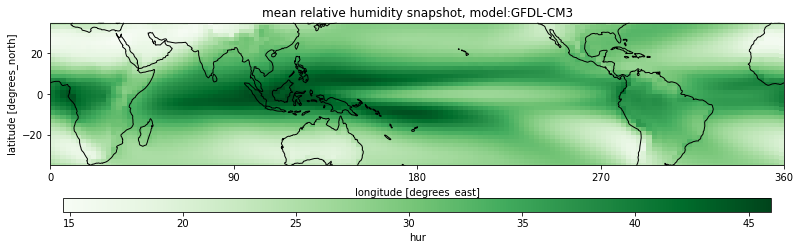

In [10]:
plot_snapshot(hur.mean(dim=('plev','time')), 'Greens', 'mean relative humidity', model)

## Relative humidity at each pressure level (climatology)

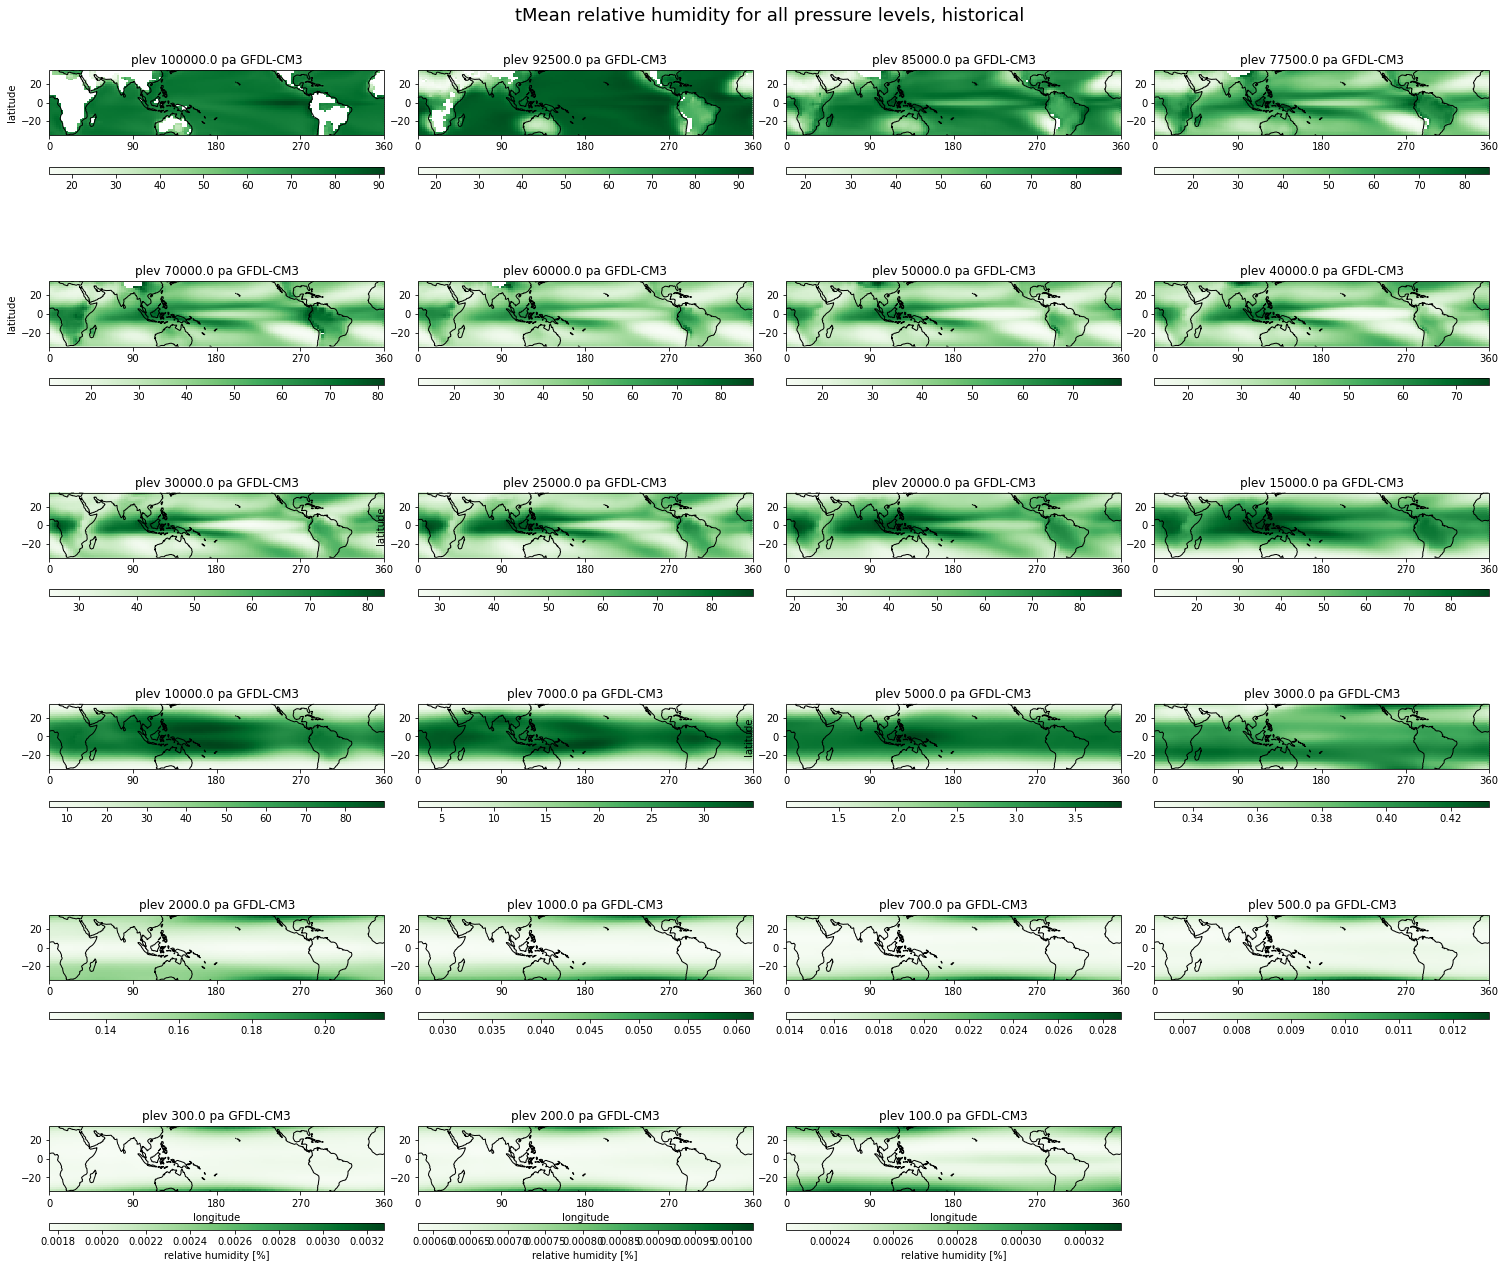

In [56]:
plevs = hur['plev']
lat = hur.lat
lon = hur.lon
lonm,latm = np.meshgrid(lon,lat)

f, axes = plt.subplots(6, 4, figsize=(25, 22),
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

f.suptitle('tMean relative humidity for all pressure levels, ' + experiment, fontsize=18, y=0.875)

 
for ax, plev in zip(axes.flat, plevs):

    pcm= ax.pcolormesh(lonm,latm, hur.mean(dim='time').sel(plev = plev),transform=ccrs.PlateCarree(),zorder=0, cmap='Greens') #,vmin=0,vmax=12)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title('plev ' + str(plev.data) + ' pa ' + model)

    if plev <= 300:
        ax.set_xlabel('longitude')
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.15, aspect=50, fraction=0.055, label = 'relative humidity [%]')
    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.15, aspect=50, fraction=0.055)

    if plev == 100000 or plev ==70000 or plev == 25000 or plev ==5000:
        ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])



plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.1, hspace=0.001)
# plt.text(-375,475, 'tMean relative humidity at different pressure levels ' + experiment,fontsize=18)
axes[-1, -1].remove()

[Text(0, 0, '100000.0'),
 Text(1, 0, '92500.0'),
 Text(2, 0, '85000.0'),
 Text(3, 0, '77500.0'),
 Text(4, 0, '70000.0'),
 Text(5, 0, '60000.0'),
 Text(6, 0, '50000.0'),
 Text(7, 0, '40000.0'),
 Text(8, 0, '30000.0'),
 Text(9, 0, '25000.0'),
 Text(10, 0, '20000.0'),
 Text(11, 0, '15000.0'),
 Text(12, 0, '10000.0'),
 Text(13, 0, '7000.0'),
 Text(14, 0, '5000.0'),
 Text(15, 0, '3000.0'),
 Text(16, 0, '2000.0'),
 Text(17, 0, '1000.0'),
 Text(18, 0, '700.0'),
 Text(19, 0, '500.0'),
 Text(20, 0, '300.0'),
 Text(21, 0, '200.0'),
 Text(22, 0, '100.0')]

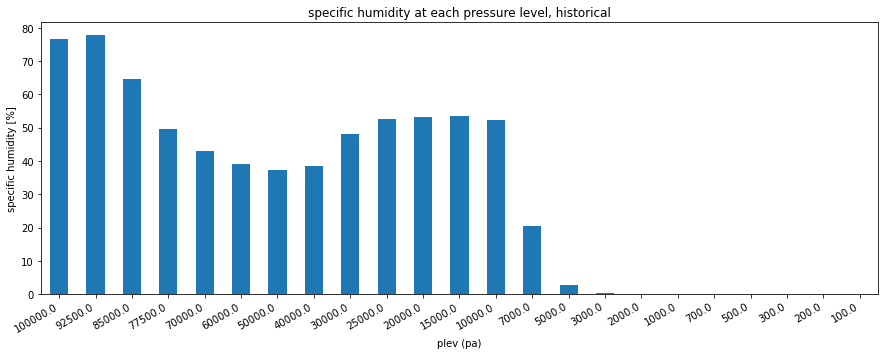

In [57]:
fig, ax = plt.subplots(figsize = (15,5))
hur.weighted(aWeights).mean(dim=('lat', 'lon')).mean(dim='time').to_series().plot.bar(ax=ax)
ax.set_title('specific humidity at each pressure level, ' + experiment)
ax.set_xlabel("plev (pa)")
ax.set_ylabel("specific humidity [%]")
ax.set_xticklabels(hur['plev'].data, rotation=30, ha='right')

## Relative humidity at each pressure level (with warming)

In [30]:
folder = home + '/Documents/data/cmip5/' + 'ds'
fileName = model + '_hur_historical.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
hur_historical = ds.hur #.fillna(0)


folder = home + '/Documents/data/cmip5/' + 'ds'
fileName = model + '_hur_rcp85.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
hur_rcp = ds.hur #.fillna(0)

In [31]:
hur_diff = xr.DataArray(
        data=hur_rcp.values - hur_historical.values,
        dims=['time','plev','lat', 'lon'],
        coords={'time': hur.time.data, 'plev': hur.plev.data, 'lat': hur.lat.data, 'lon': hur.lon.data},
        attrs={'units':'kg/kg'}
        )

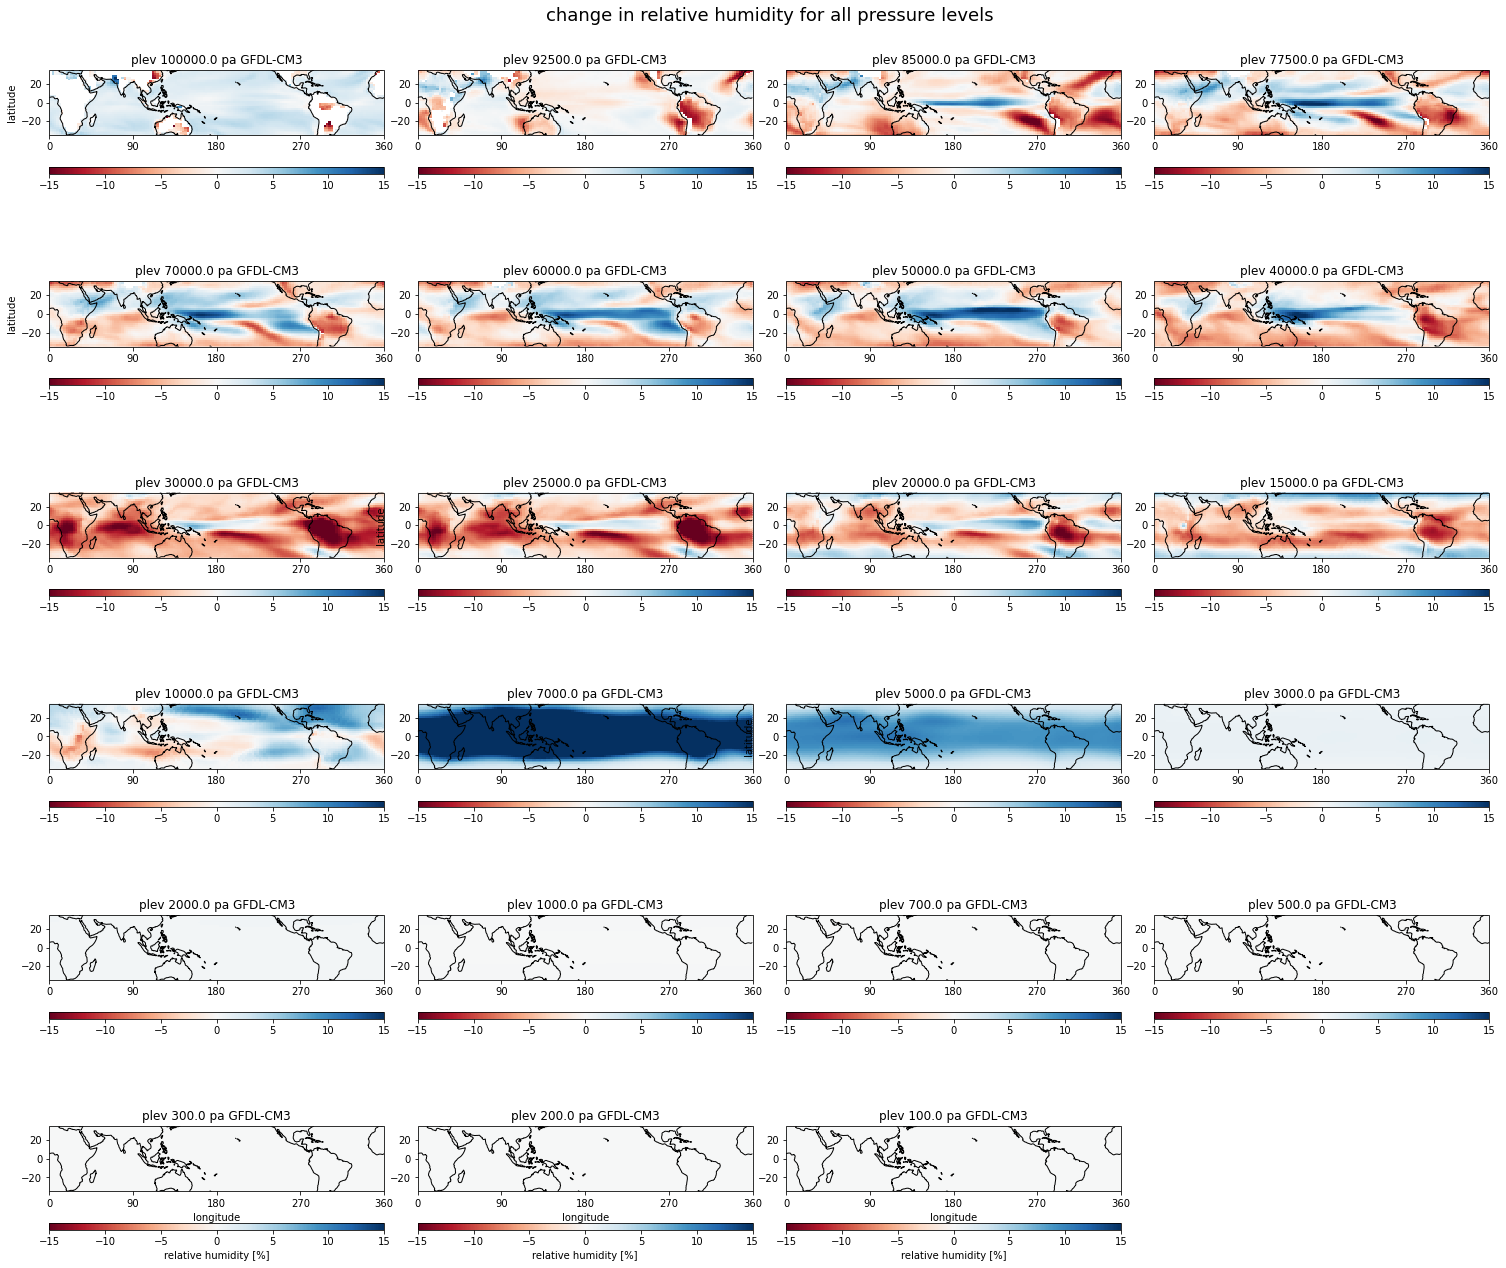

In [34]:
plevs = hur['plev']
lat = hur.lat
lon = hur.lon
lonm,latm = np.meshgrid(lon,lat)

f, axes = plt.subplots(6, 4, figsize=(25, 22),
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

f.suptitle('change in relative humidity for all pressure levels', fontsize=18, y=0.875)

 
for ax, plev in zip(axes.flat, plevs):

    pcm= ax.pcolormesh(lonm,latm, hur_diff.mean(dim='time').sel(plev = plev),transform=ccrs.PlateCarree(),zorder=0, cmap="RdBu", vmin=-15, vmax=15)#, vmin=-np.nanmax(hur_diff.mean(dim='time').sel(plev = plev).values), vmax=np.nanmax(hur_diff.mean(dim='time').sel(plev = plev).values)) #,vmin=0,vmax=12)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title('plev ' + str(plev.data) + ' pa ' + model)

    if plev <= 300:
        ax.set_xlabel('longitude')
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.15, aspect=50, fraction=0.055, label = 'relative humidity [%]')
    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.15, aspect=50, fraction=0.055)

    if plev == 100000 or plev ==70000 or plev == 25000 or plev ==5000:
        ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])



plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.1, hspace=0.001)
# plt.text(-375,475, 'tMean relative humidity at different pressure levels ' + experiment,fontsize=18)
axes[-1, -1].remove()

[Text(0, 0, '100000.0'),
 Text(1, 0, '92500.0'),
 Text(2, 0, '85000.0'),
 Text(3, 0, '77500.0'),
 Text(4, 0, '70000.0'),
 Text(5, 0, '60000.0'),
 Text(6, 0, '50000.0'),
 Text(7, 0, '40000.0'),
 Text(8, 0, '30000.0'),
 Text(9, 0, '25000.0'),
 Text(10, 0, '20000.0'),
 Text(11, 0, '15000.0'),
 Text(12, 0, '10000.0'),
 Text(13, 0, '7000.0'),
 Text(14, 0, '5000.0'),
 Text(15, 0, '3000.0'),
 Text(16, 0, '2000.0'),
 Text(17, 0, '1000.0'),
 Text(18, 0, '700.0'),
 Text(19, 0, '500.0'),
 Text(20, 0, '300.0'),
 Text(21, 0, '200.0'),
 Text(22, 0, '100.0')]

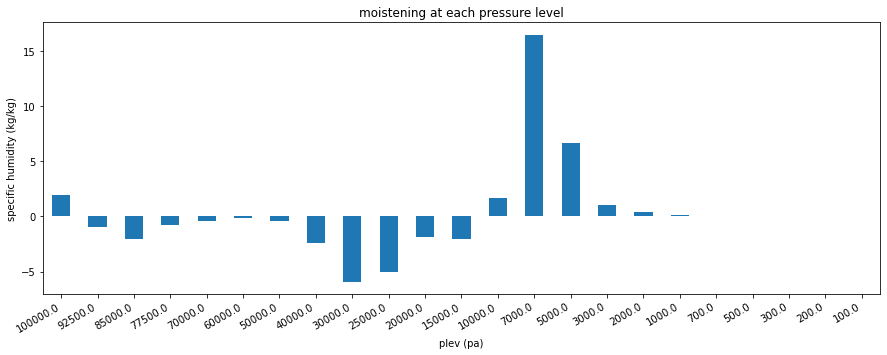

In [35]:
fig, ax = plt.subplots(figsize = (15,5))
hur_diff.weighted(aWeights).mean(dim=('lat', 'lon')).mean(dim='time').to_series().plot.bar(ax=ax)
ax.set_title('moistening at each pressure level')
ax.set_xlabel("plev (pa)")
ax.set_ylabel("specific humidity (kg/kg)")
ax.set_xticklabels(hur['plev'].data, rotation=30, ha='right')

## mean relative humidity

In [ ]:
# interp_hur = hur.interp(pressure=pressure_levels, method='polynomial', order=3)